SELECT absmag_r,uminusr FROM StellarMasses LIMIT 5000
-109.491073 16.401803 -0.506175 5.567925


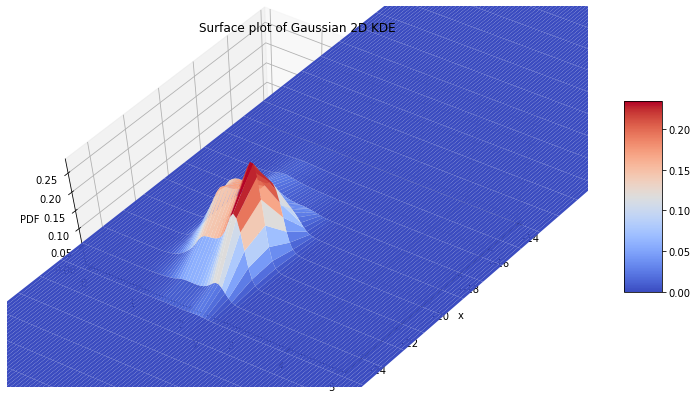

In [4]:
#
# Based on https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
#
import numpy as np
import scipy.stats as st
from astroquery.gama import GAMA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x_col = 'absmag_r'
y_col = 'uminusr'
query = 'SELECT '+x_col+','+y_col+' FROM StellarMasses LIMIT 5000' 
print(query)
result = GAMA.query_sql(query)
x = result[x_col]
y = result[y_col]

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)

# calc values
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
# Plot
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlim(-14,-25)
ax.set_ylim(0,5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)



